In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
def equify(data, pid):
    d = {}
    for i in range(len(data['tym'])):
        if data['tym'][i] not in d:
            d[data['tym'][i]] = data['q'][i]
        d[data['tym'][i]] = max(d[data['tym'][i]], data['q'][i])
    
    plotd = {pid:[]}
    tym = []
    
    for t in d:
        plotd[pid].append(d[t])
        tym.append(t)
    
    return (tym, plotd)

def plot(tym, plotd):
    plt.rcParams["figure.figsize"] = [10, 6]
    
    pdf = pd.DataFrame(plotd, index=tym)
    pdf.plot.line()
    plt.title("Queue occupancy changes in switch over time")
    plt.ylabel("Queue occupancy")
    plt.xlabel("Time instance(ms)")
    

def QueueAnalysis(logf, targetSwid, port):
    log = open(logf, 'r')
    swdata = {}
        
    for line in log:
        if line.startswith('QUEUE'):
            sline = line.split(' ')
            deviceline = sline[2].split('/')
            time = int(sline[1])
            swid = int(deviceline[2])
            portid = int(deviceline[4])
            fromqueue = int(sline[3])
            toqueue = int(sline[4])
            
            if swid == targetSwid and port == portid:
                if swid not in swdata:
                    swdata[swid] = {}
                if portid not in swdata[swid]:
                    swdata[swid][portid] = {'tym': [], 'q': []}

                swdata[swid][portid]['q'].append(toqueue)
                swdata[swid][portid]['tym'].append(time)
                
    for port in swdata[targetSwid]:
        swdata[targetSwid][port] = equify(swdata[targetSwid][port], port)
                
    return swdata[targetSwid][port]
            

        

        
def ProbeAnalysis(logf, targetSwid, port):
    log = open(logf, 'r')
    swdata = {}
    
    for line in log:
        if line.startswith('PROBE'):
            sline = line.split(' ')
            time = int(sline[1])
            swid = int(sline[2])
            portid = int(sline[3])
            toqueue = int(sline[4])
            
            if swid == targetSwid and port == portid:
                if swid not in swdata:
                    swdata[swid] = {}
                if portid not in swdata[swid]:
                    swdata[swid][portid] = {'tym': [], 'q': []}

                swdata[swid][portid]['q'].append(toqueue)
                swdata[swid][portid]['tym'].append(time)
                
    for port in swdata[targetSwid]:
        swdata[targetSwid][port] = equify(swdata[targetSwid][port], port)
        
    return swdata[targetSwid][port]

def findIdx(arr, maxval):
    for i in range(len(arr)):
        if arr[i] >= maxval:
            return i
    
        
def Analyze(logf, swid_wrtprobe, portid, maxtym = 50000):
    q = QueueAnalysis(logf, swid_wrtprobe-1,portid)
    p = ProbeAnalysis(logf, swid_wrtprobe,portid)

    mintym = min(q[0][-1], p[0][-1])
    mintym = min(mintym, maxtym)
    
    q_i = findIdx(q[0], mintym)
    queuetym = q[0][:q_i]
    queuepd = q[1][portid][:q_i]
    
    p_i = findIdx(p[0], mintym)
    probetym = p[0][:p_i]
    probepd = p[1][portid][:p_i]
    
    plot(queuetym, queuepd)
    plot(probetym, probepd)
    
def Q(logf, swid, portid, maxtym = 50000):
    q = QueueAnalysis(logf, swid, portid)

    mintym = min(q[0][-1], q[0][-1])
    mintym = min(mintym, maxtym)
    
    q_i = findIdx(q[0], mintym)
    queuetym = q[0][:q_i]
    queuepd = q[1][portid][:q_i]
    
    
    plot(queuetym, queuepd)
    #plot(probetym, probepd)
    
        

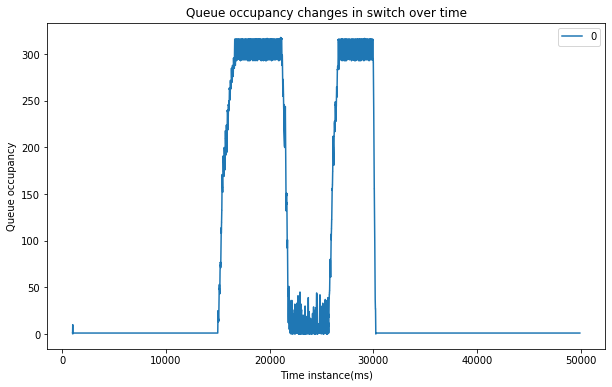

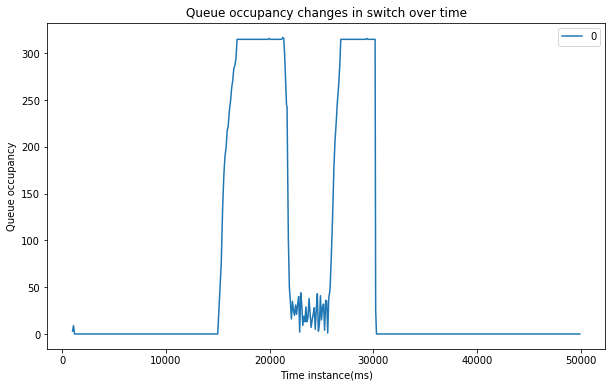

In [146]:
# for queue analysis, the id of switch starts from 0 but not for the switch in probe analysis
# QueueAnalysis('QueueProbeAll.log', 11,3)
# ProbeAnalysis('QueueProbeAll.log', 12, 3)
# Analyze('QueueProbeAllDifferentBw.log', 12, 1)
Analyze('QueueProbeAll.log', 12, 3)


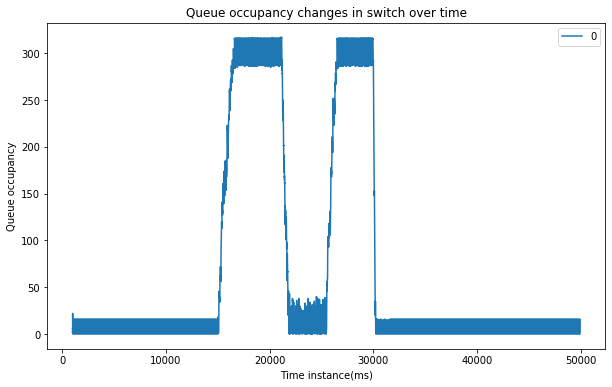

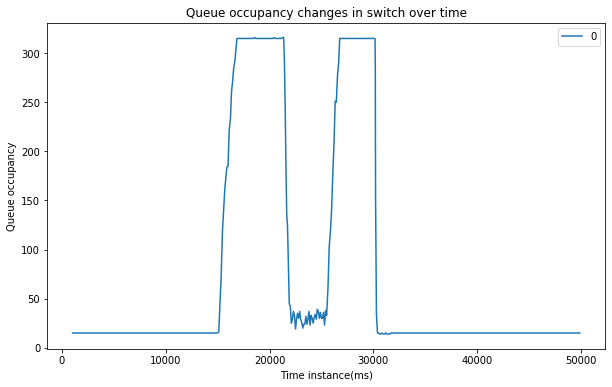

In [154]:
Analyze('QueueProbeAllDifferentBw2.log', 12, 3)

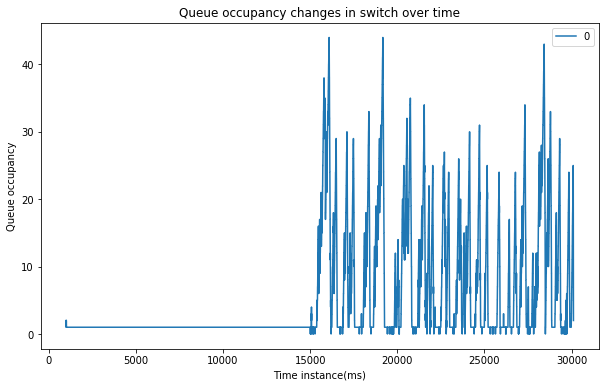

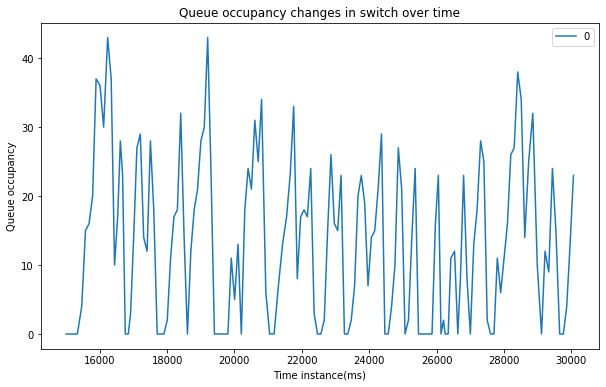

In [165]:
Analyze('qprobe.log', 13, 3)

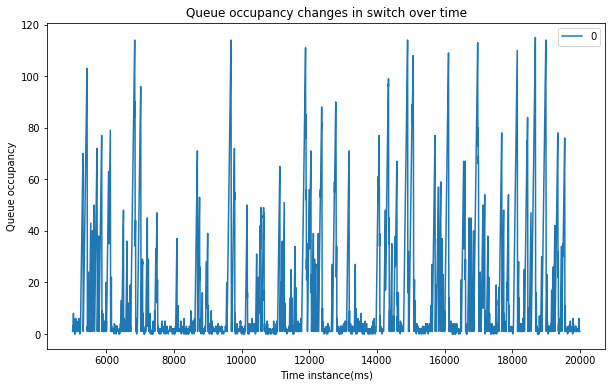

In [20]:
Q('queue.log', 1, 0)

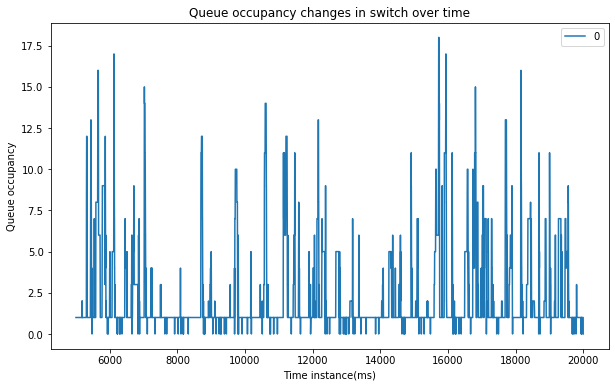

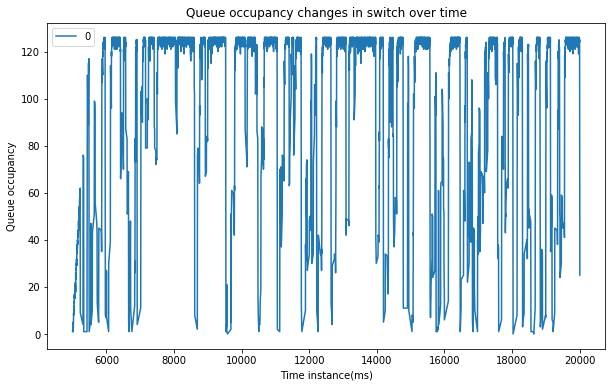

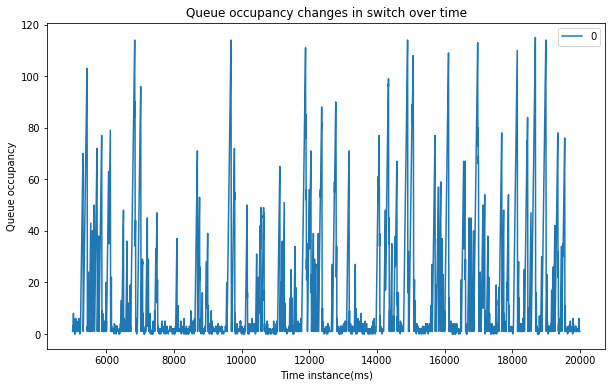

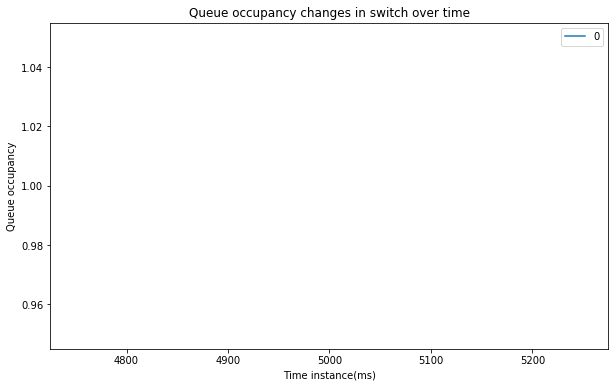

In [22]:
Q('queue.log', 0, 0)
Q('queue.log', 0, 1)
Q('queue.log', 1, 0)
Q('queue.log', 1, 1)

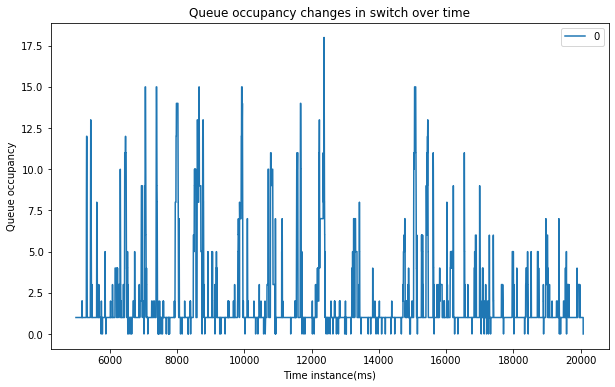

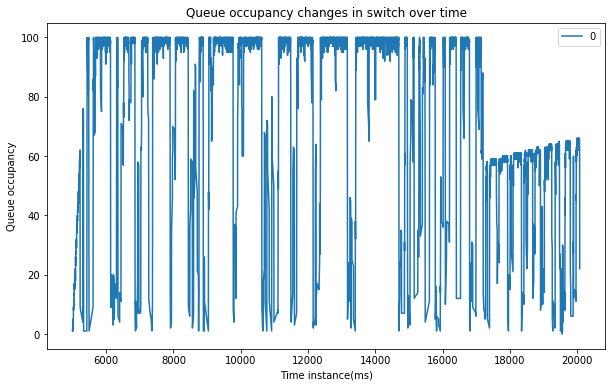

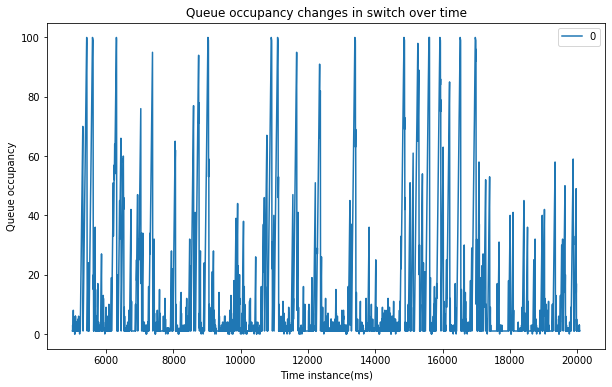

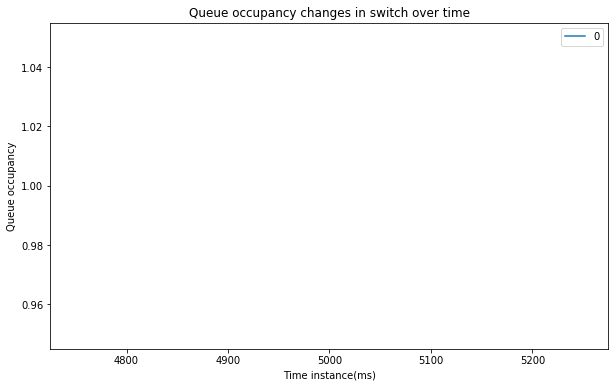

In [23]:
Q('queue2.log', 0, 0)
Q('queue2.log', 0, 1)
Q('queue2.log', 1, 0)
Q('queue2.log', 1, 1)

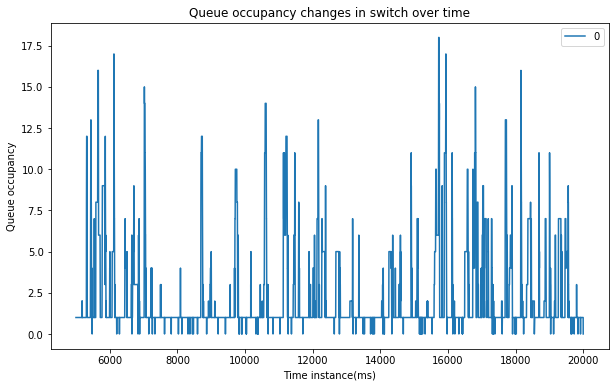

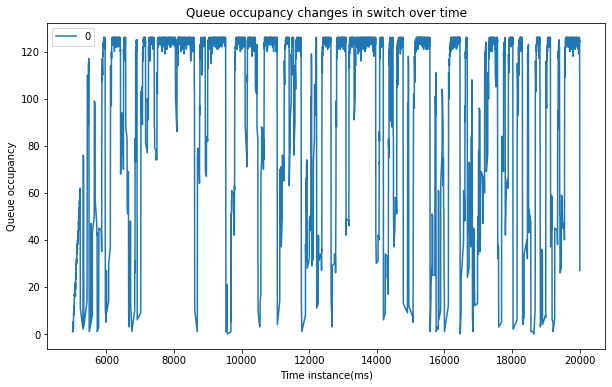

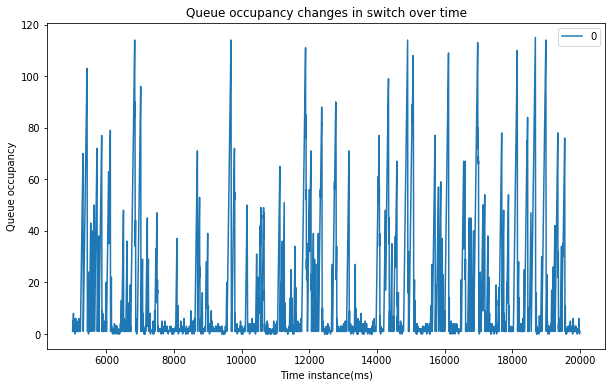

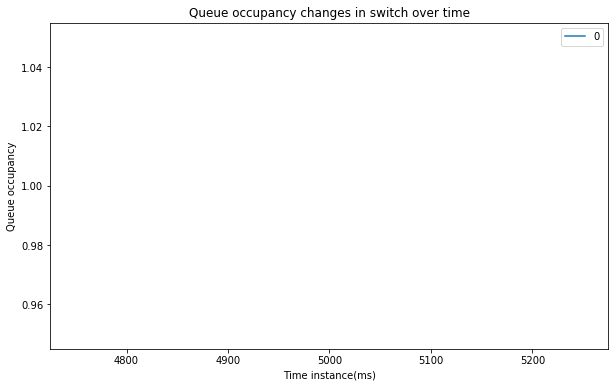

In [24]:
Q('queue3.log', 0, 0)
Q('queue3.log', 0, 1)
Q('queue3.log', 1, 0)
Q('queue3.log', 1, 1)

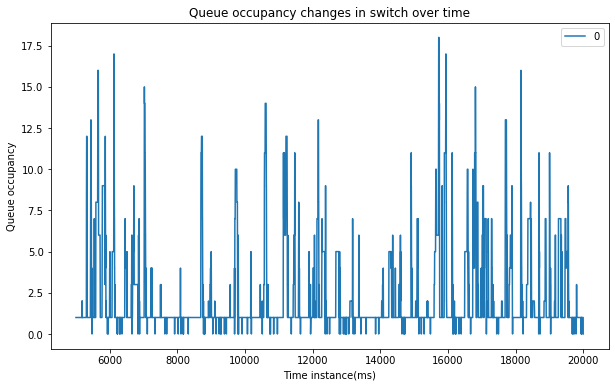

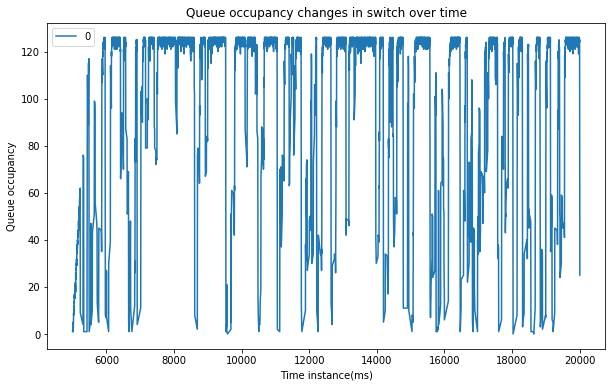

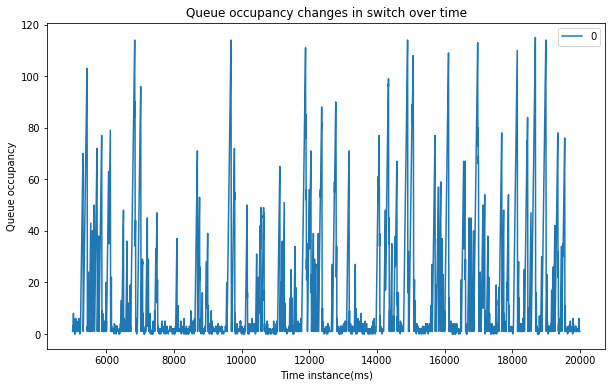

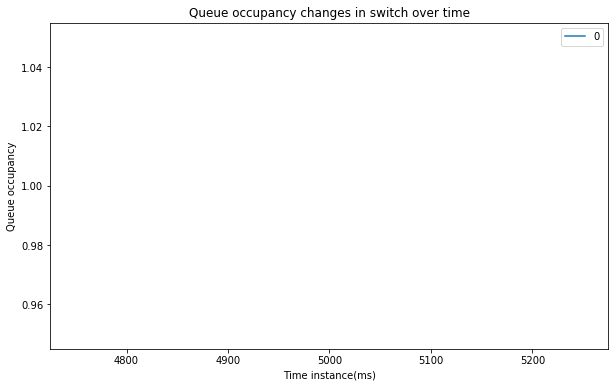

In [25]:
Q('queue-neo.log', 0, 0)
Q('queue-neo.log', 0, 1)
Q('queue-neo.log', 1, 0)
Q('queue-neo.log', 1, 1)

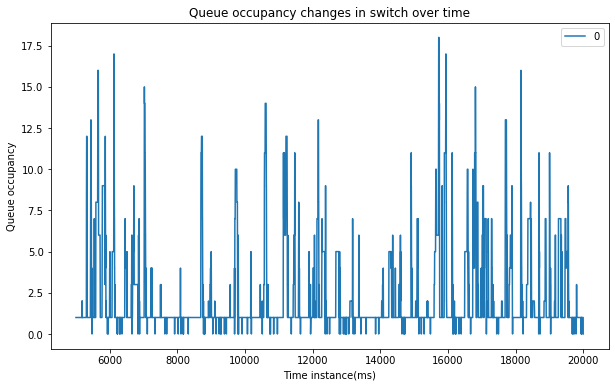

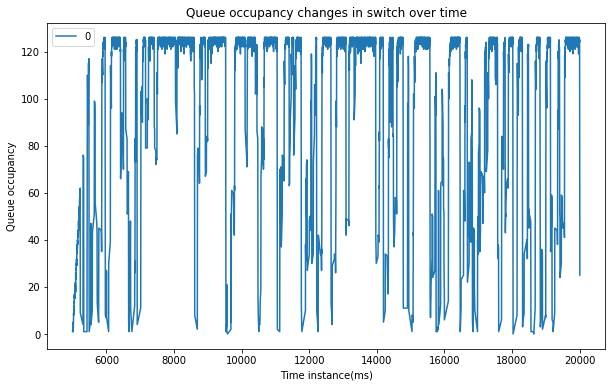

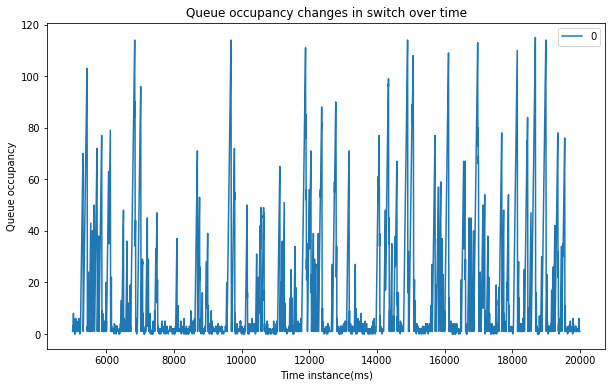

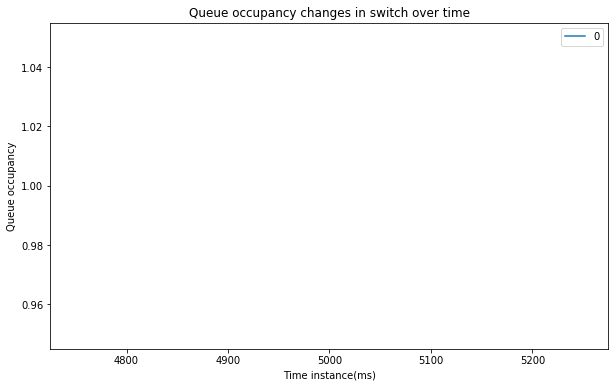

In [26]:
Q('queue9.log', 0, 0)
Q('queue9.log', 0, 1)
Q('queue9.log', 1, 0)
Q('queue9.log', 1, 1)